# MC2 Data understanding and preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder

#import data to workspace
MC2_original = pd.read_csv('MC2_Datasets\MC2_raw.csv')
mc2_data = MC2_original.copy()

### plot template

In [2]:
plt.style.use('ggplot')

## Data Understanding

### Date Sorting

In [3]:
mc2_data = mc2_data.sort_values(by='Date')
mc2_data.head(8)

,Part,IC 2D,Lot,Date,Time,Machine,Server result,Machine result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
0,791-00529,1,P 8 7,01/12/2020,01:10:17,PA05-1901,OK,OK,17.8,-2.3,-13.7,25.3,NaN
5416,791-00529,3929,P 8 7,01/12/2020,13:52:33,PA05-1901,OK,OK,12.1,-1.4,40.0,29.2,NaN
5415,791-00529,3928,P 8 7,01/12/2020,13:52:33,PA05-1901,OK,OK,20.9,11.9,-67.6,11.3,NaN
5414,791-00529,3927,P 8 7,01/12/2020,13:52:09,PA05-1901,OK,OK,4.5,-0.5,80.3,47.9,NaN
5413,791-00529,3926,P 8 7,01/12/2020,13:52:09,PA05-1901,OK,OK,4.2,2.7,148.7,43.6,NaN
5412,791-00529,3925,P 8 7,01/12/2020,13:52:09,PA05-1901,OK,OK,5.6,5.6,81.3,54.9,NaN
5411,791-00529,3924,P 8 7,01/12/2020,13:52:09,PA05-1901,OK,OK,7.1,6.0,85.6,86.4,NaN
5410,791-00529,3923,P 8 7,01/12/2020,13:52:09,PA05-1901,OK,OK,-3.4,0.6,77.6,70.4,NaN


### Missing values in each column

In [4]:
print("Brief Report of mssing values in MC2 Dataset:")
print(mc2_data.isnull().sum())

Brief Report of mssing values in MC2 Dataset:
Part                   0
IC 2D                  0
Lot                    0
Date                   0
Time                   0
Machine                0
Server result          0
Machine result         0
(um)Point1             0
(um)Point2          4086
(um)Point3         12801
(um)Point4         12801
(um)Point5        201983
dtype: int64


1.2) define the day of week, see how many days are OK and NG

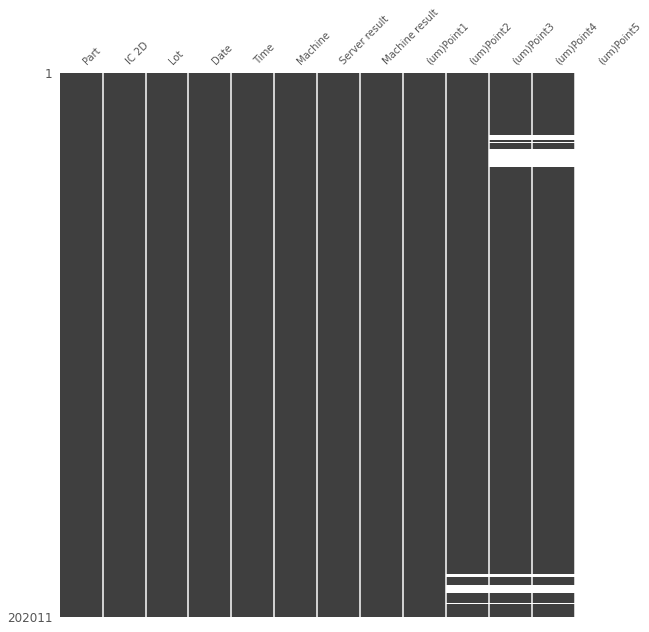

In [5]:
fig, axs = plt.subplots(figsize=(10,10))
msno.matrix(mc2_data,ax=axs,sparkline=False,fontsize=10)
plt.show()
#msno.bar(mc2_data).title.set_text('Barchart of non-null values in columns in MC2 dataframe')

### Get day of week

In [6]:
mc2_data['Date'] = pd.to_datetime(mc2_data['Date'])
mc2_data['dayOfWeek'] = mc2_data['Date'].dt.day_name()
mc2_data

,Part,IC 2D,Lot,Date,Time,Machine,Server result,Machine result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5,dayOfWeek
0,791-00529,1,P 8 7,2020-01-12,01:10:17,PA05-1901,OK,OK,17.8,-2.3,-13.7,25.3,NaN,Sunday
5416,791-00529,3929,P 8 7,2020-01-12,13:52:33,PA05-1901,OK,OK,12.1,-1.4,40.0,29.2,NaN,Sunday
5415,791-00529,3928,P 8 7,2020-01-12,13:52:33,PA05-1901,OK,OK,20.9,11.9,-67.6,11.3,NaN,Sunday
5414,791-00529,3927,P 8 7,2020-01-12,13:52:09,PA05-1901,OK,OK,4.5,-0.5,80.3,47.9,NaN,Sunday
5413,791-00529,3926,P 8 7,2020-01-12,13:52:09,PA05-1901,OK,OK,4.2,2.7,148.7,43.6,NaN,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166066,791-00529,7983,P 8 7,2020-12-29,02:15:47,PA05-1901,OK,OK,28.7,-4.4,26.2,81.0,NaN,Tuesday
166065,791-00529,7982,P 8 7,2020-12-29,02:14:55,PA05-1901,OK,OK,31.1,43.4,60.0,96.6,NaN,Tuesday
166064,791-00529,7981,P 8 7,2020-12-29,02:14:55,PA05-1901,OK,OK,41.9,40.8,78.0,147.5,NaN,Tuesday
166073,791-00529,7990,P 8 7,2020-12-29,02:16:39,PA05-1901,OK,OK,1.6,6.8,40.6,108.7,NaN,Tuesday


### Machine result analysis

### daily NG rate

,Date,Machine result,count
45,29/12/2020,NG,50
43,28/12/2020,NG,638
40,26/12/2020,NG,798
38,25/12/2020,NG,27
36,24/12/2020,NG,613
34,23/12/2020,NG,223
32,22/12/2020,NG,197
30,21/12/2020,NG,144
28,19/12/2020,NG,56
26,18/12/2020,NG,204


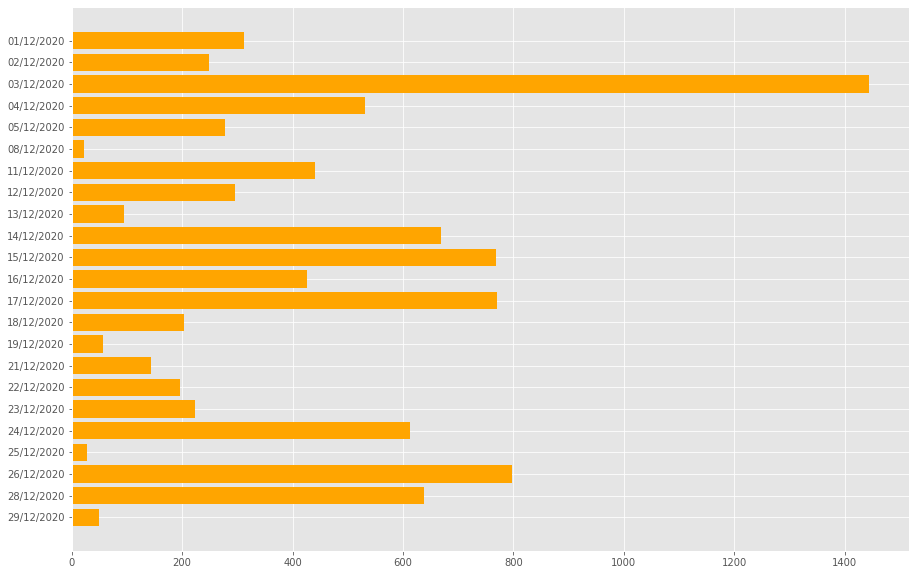

In [7]:
dftest = MC2_original.copy()
dftest = dftest.groupby(["Date","Machine result"])['Machine result'].count().reset_index(name='count')
dftest.sort_values(by='Machine result',ascending=True,inplace=True)
dftest = dftest.iloc[:23,:]
dftest.sort_values(by='Date',ascending=False,inplace=True)
dateArr = dftest['Date']
x = dateArr.to_numpy()
countArr = dftest['count']
y = countArr.to_numpy()

display(dftest)

fig,ax = plt.subplots(1,figsize=(15,10))
ax.barh(x,y,color='orange')
plt.show()

In [8]:
#mc2_data.groupby(['dayOfWeek', 'Machine result']).size().unstack(fill_value=0)
df1 = mc2_data.groupby(['dayOfWeek', 'Machine result'])['Machine result'].agg('count')
#df1 = mc2_data.groupby(['dayOfWeek', 'Machine result'])['Machine result'].count().reset_index(name="count")
df1

dayOfWeek  Machine result
Friday     NG                  231
           OK                13181
Monday     NG                 1451
           OK                24854
Saturday   NG                 1149
           OK                22299
Sunday     NG                  939
           OK                23429
Thursday   NG                 3269
           OK                42014
Tuesday    NG                 1293
           OK                31824
Wednesday  NG                  920
           OK                35158
Name: Machine result, dtype: int64

,Machine result,dayOfWeek,count
0,NG,Friday,231
6,NG,Wednesday,920
3,NG,Sunday,939
2,NG,Saturday,1149
5,NG,Tuesday,1293
1,NG,Monday,1451
4,NG,Thursday,3269


<AxesSubplot:xlabel='Machine result = "NG" count', ylabel='dayOfWeek'>

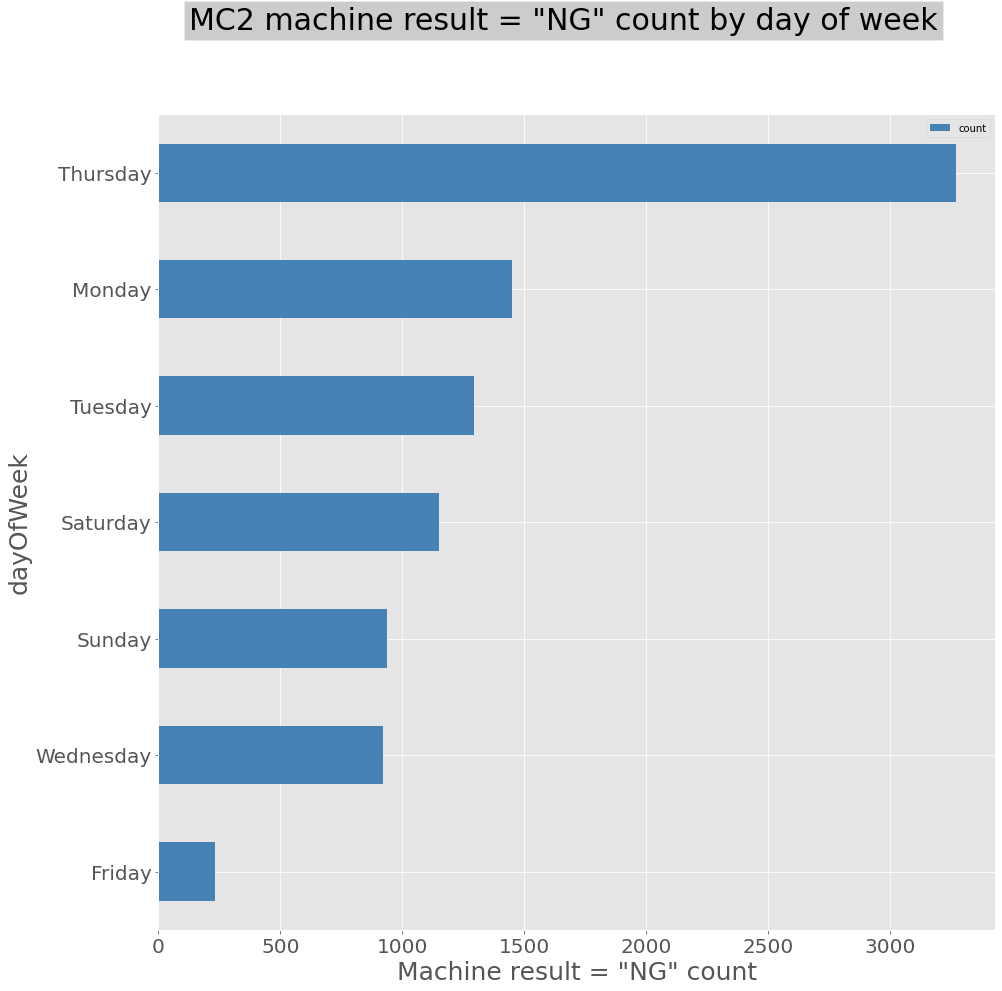

In [9]:
df2 = mc2_data.groupby(['Machine result','dayOfWeek'])['Machine result'].count().reset_index(name='count')
df2.sort_values(by='count',ascending=True,inplace=True)
df2 = df2.iloc[:7,:]
display(df2)

fig, axs = plt.subplots(figsize=(15,15))
plt.xlabel('Machine result = "NG" count',fontsize=25)
plt.ylabel('Day of Week',fontsize=25)
plt.suptitle('MC2 machine result = "NG" count by day of week',fontsize=30,bbox={'facecolor':'0.8','pad':5})
df2.plot(x='dayOfWeek',y='count',kind='barh',color='steelblue',ax=axs,grid=True,fontsize=20)


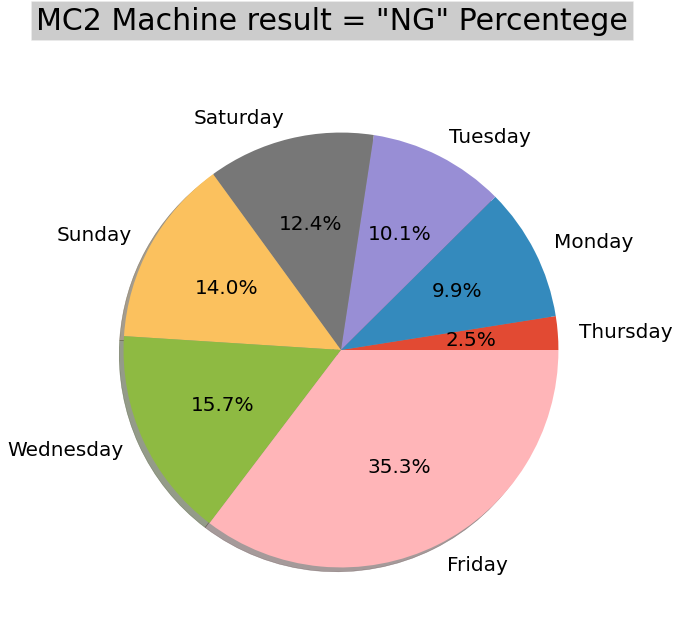

In [10]:

fig, axs = plt.subplots(figsize=(10,10))
plt.suptitle('MC2 Machine result = "NG" Percentege',fontsize=30,bbox={'facecolor':'0.8','pad':5})

dow_label = ['Thursday','Monday','Tuesday','Saturday','Sunday','Wednesday','Friday']
#dow_explode = (0.3,0,0,0,0,0,0.2)
#this color very disgusting...
#dow_colors = {'red','orange','yellow','green','blue','violet','purple'}
plt.pie(df2['count'],labels=dow_label,autopct='%1.1f%%',shadow=True,
        textprops={'fontsize':20})
plt.show()

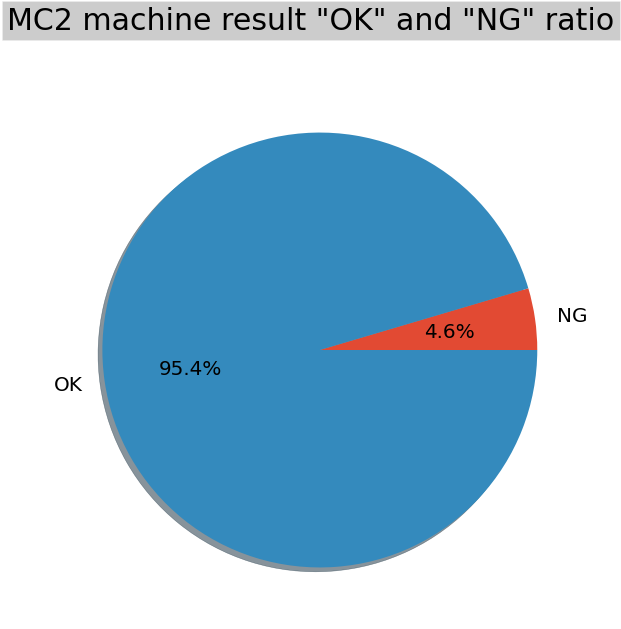

In [11]:
df3 = mc2_data.groupby(['Machine result'])['Machine result'].count().reset_index(name='count')
fig, axs = plt.subplots(figsize=(10,10))
plt.suptitle('MC2 machine result "OK" and "NG" ratio',fontsize=30,bbox={'facecolor':'0.8','pad':5})

ratio_label = ['NG','OK']
plt.pie(df3['count'],labels=ratio_label,autopct='%1.1f%%',shadow=True,
        textprops={'fontsize':20})
plt.show()

### (um)Points analysis           

<AxesSubplot:>

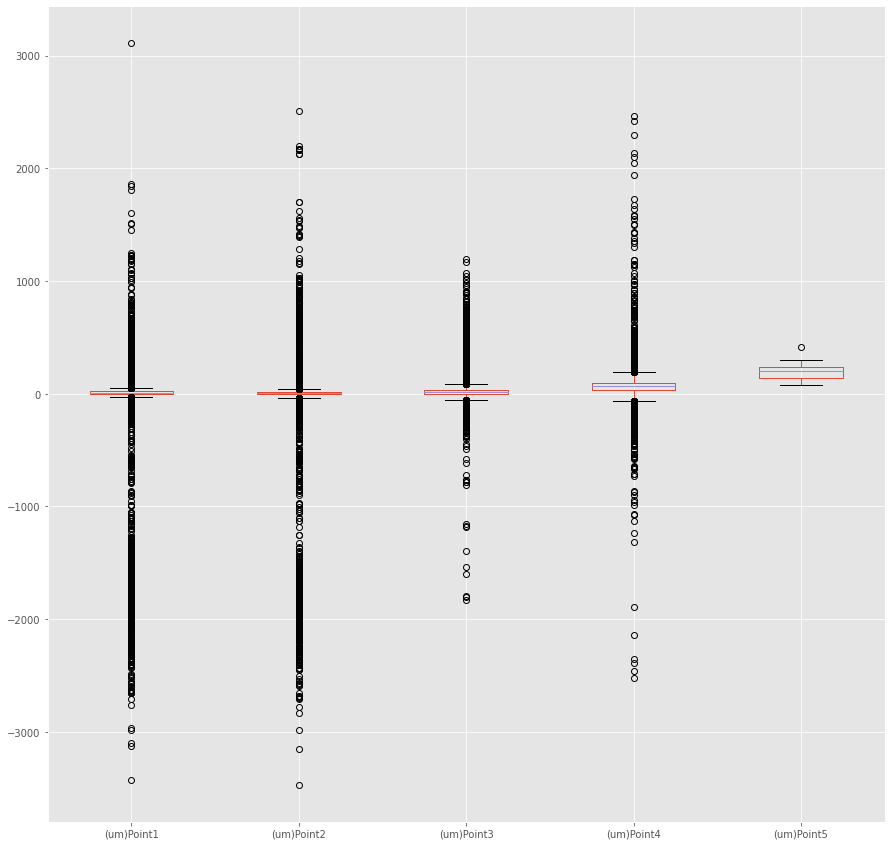

In [12]:
fig, axs = plt.subplots(figsize=(15,15))
#plt.suptitle('MC2 (um)Point1 to (um)Point5 boxplot',fontsize=30,bbox={'facecolor':'0.8','pad':5})
mc2_data.boxplot(column=['(um)Point1','(um)Point2','(um)Point3','(um)Point4','(um)Point5'])

### data distribution

rename columns to ease in later operation(avoid typing to much, eliminate brackets() and empty spaces)

What is KDE? What does KDE tells you?

KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable.
https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/

<AxesSubplot:xlabel='(um)Point5', ylabel='Count'>

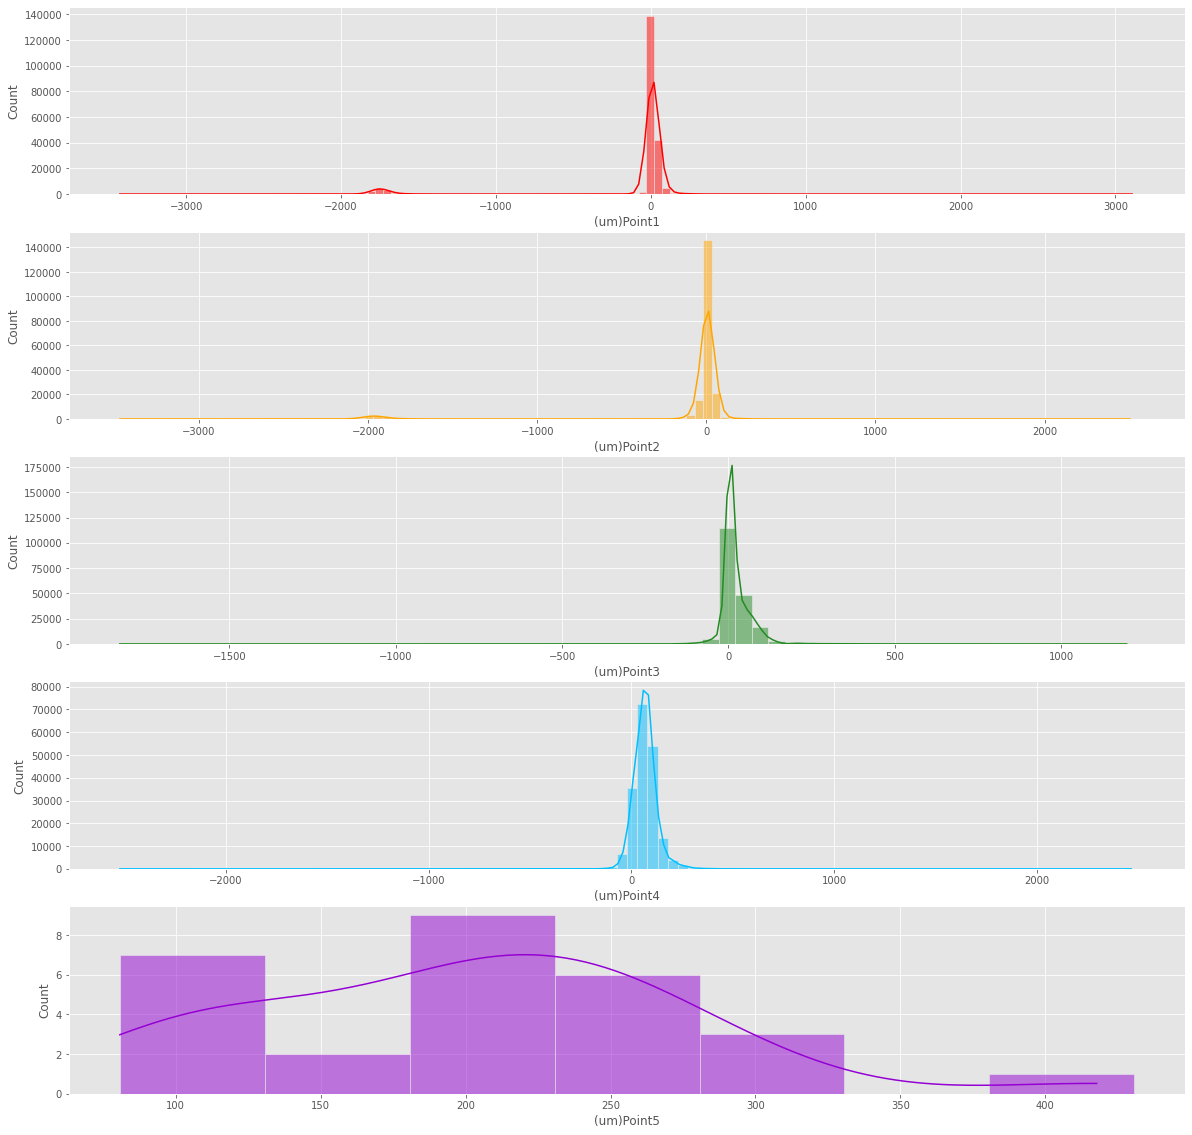

In [13]:
fig, axs = plt.subplots(5,1,figsize=(20,20))

sns.histplot(mc2_data['(um)Point1'],ax=axs[0],color='red',binwidth=50,kde=True)
sns.histplot(mc2_data['(um)Point2'],ax=axs[1],color='orange',binwidth=50,kde=True)
sns.histplot(mc2_data['(um)Point3'],ax=axs[2],color='forestgreen',binwidth=50,kde=True)
sns.histplot(mc2_data['(um)Point4'],ax=axs[3],color='deepskyblue',binwidth=50,kde=True)
sns.histplot(mc2_data['(um)Point5'],ax=axs[4],color='darkviolet',binwidth=50,kde=True)


## Data Preparation

### drop unnecessary columns

In [14]:
mc2_data.drop(['Part','IC 2D','Lot','Date','Time','Machine','Server result'],
              axis=1,inplace=True)
mc2_data.head(8)


,Machine result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5,dayOfWeek
0,OK,17.8,-2.3,-13.7,25.3,NaN,Sunday
5416,OK,12.1,-1.4,40.0,29.2,NaN,Sunday
5415,OK,20.9,11.9,-67.6,11.3,NaN,Sunday
5414,OK,4.5,-0.5,80.3,47.9,NaN,Sunday
5413,OK,4.2,2.7,148.7,43.6,NaN,Sunday
5412,OK,5.6,5.6,81.3,54.9,NaN,Sunday
5411,OK,7.1,6.0,85.6,86.4,NaN,Sunday
5410,OK,-3.4,0.6,77.6,70.4,NaN,Sunday


### statistical analysis

In [15]:
mc2_data.describe()

,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
count,202011.000000,197925.000000,189210.000000,189210.000000,28.000000
mean,-95.793639,-79.054781,22.502174,66.966556,201.392857
std,431.599648,405.384053,49.343961,62.955873,75.324596
min,-3428.200000,-3468.700000,-1829.500000,-2521.700000,80.700000
25%,0.400000,-4.600000,-0.400000,32.100000,143.775000
50%,9.100000,4.900000,11.700000,65.500000,201.950000
75%,21.000000,15.800000,34.400000,96.200000,238.350000
max,3107.800000,2505.700000,1197.600000,2463.300000,417.700000


### reindex and rename columns

In [16]:
#put machine result to the end
column_names = ['dayOfWeek','(um)Point1','(um)Point2','(um)Point3','(um)Point4','(um)Point5','Machine result']
mc2_data = mc2_data.reindex(columns=column_names)
mc2_data.head(8)

,dayOfWeek,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5,Machine result
0,Sunday,17.8,-2.3,-13.7,25.3,NaN,OK
5416,Sunday,12.1,-1.4,40.0,29.2,NaN,OK
5415,Sunday,20.9,11.9,-67.6,11.3,NaN,OK
5414,Sunday,4.5,-0.5,80.3,47.9,NaN,OK
5413,Sunday,4.2,2.7,148.7,43.6,NaN,OK
5412,Sunday,5.6,5.6,81.3,54.9,NaN,OK
5411,Sunday,7.1,6.0,85.6,86.4,NaN,OK
5410,Sunday,-3.4,0.6,77.6,70.4,NaN,OK


In [17]:
mc2_data.rename(columns={'(um)Point1':'point1',
                         '(um)Point2':'point2',
                         '(um)Point3':'point3',
                         '(um)Point4':'point4',
                         '(um)Point5':'point5',
                         'Machine result':'machineResult'},inplace=True)
mc2_data

,dayOfWeek,point1,point2,point3,point4,point5,machineResult
0,Sunday,17.8,-2.3,-13.7,25.3,NaN,OK
5416,Sunday,12.1,-1.4,40.0,29.2,NaN,OK
5415,Sunday,20.9,11.9,-67.6,11.3,NaN,OK
5414,Sunday,4.5,-0.5,80.3,47.9,NaN,OK
5413,Sunday,4.2,2.7,148.7,43.6,NaN,OK
...,...,...,...,...,...,...,...
166066,Tuesday,28.7,-4.4,26.2,81.0,NaN,OK
166065,Tuesday,31.1,43.4,60.0,96.6,NaN,OK
166064,Tuesday,41.9,40.8,78.0,147.5,NaN,OK
166073,Tuesday,1.6,6.8,40.6,108.7,NaN,OK


### label encoding machine result

In [18]:
#creating instance of labelencoder
le = LabelEncoder()
mc2_data['machineResult'] = le.fit_transform(mc2_data['machineResult'])
mc2_data['machineResult'].unique()
mc2_data

,dayOfWeek,point1,point2,point3,point4,point5,machineResult
0,Sunday,17.8,-2.3,-13.7,25.3,NaN,1
5416,Sunday,12.1,-1.4,40.0,29.2,NaN,1
5415,Sunday,20.9,11.9,-67.6,11.3,NaN,1
5414,Sunday,4.5,-0.5,80.3,47.9,NaN,1
5413,Sunday,4.2,2.7,148.7,43.6,NaN,1
...,...,...,...,...,...,...,...
166066,Tuesday,28.7,-4.4,26.2,81.0,NaN,1
166065,Tuesday,31.1,43.4,60.0,96.6,NaN,1
166064,Tuesday,41.9,40.8,78.0,147.5,NaN,1
166073,Tuesday,1.6,6.8,40.6,108.7,NaN,1


### encode day of week

In [19]:
days = {'Sunday':   0,
        'Monday':   1,
        'Tuesday':  2,
        'Wednesday':3,
        'Thursday': 4,
        'Friday':   5,
        'Saturday': 6}
mc2_data['dayOfWeek'] = mc2_data['dayOfWeek'].apply(lambda x : days[x])
mc2_data.groupby(mc2_data.dayOfWeek)
mc2_data.head(8)

,dayOfWeek,point1,point2,point3,point4,point5,machineResult
0,0,17.8,-2.3,-13.7,25.3,NaN,1
5416,0,12.1,-1.4,40.0,29.2,NaN,1
5415,0,20.9,11.9,-67.6,11.3,NaN,1
5414,0,4.5,-0.5,80.3,47.9,NaN,1
5413,0,4.2,2.7,148.7,43.6,NaN,1
5412,0,5.6,5.6,81.3,54.9,NaN,1
5411,0,7.1,6.0,85.6,86.4,NaN,1
5410,0,-3.4,0.6,77.6,70.4,NaN,1


### missing values percentage in each points

In [20]:
print("MC2 column point1 to point5 missing values percentage\n")
print("Percentage of missing values in point1:  %.2f"% round((mc2_data['point1'].isnull().sum()/len(mc2_data.index) * 100),2),"%")
print("Percentage of missing values in point2: ",round((mc2_data['point2'].isnull().sum()/len(mc2_data.index) * 100),2),"%")
print("Percentage of missing values in point3: ",round((mc2_data['point3'].isnull().sum()/len(mc2_data.index) * 100),2),"%")
print("Percentage of missing values in point4: ",round((mc2_data['point4'].isnull().sum()/len(mc2_data.index) * 100),2),"%")
print("Percentage of missing values in point5:",round((mc2_data['point5'].isnull().sum()/len(mc2_data.index) * 100),2),"%")
print("\n")


MC2 column point1 to point5 missing values percentage

Percentage of missing values in point1:  0.00 %
Percentage of missing values in point2:  2.02 %
Percentage of missing values in point3:  6.34 %
Percentage of missing values in point4:  6.34 %
Percentage of missing values in point5: 99.99 %




### drop point5 since 99.99% are missing

In [21]:
mc2_data.drop(['point5'],axis=1,inplace=True)
mc2_data.tail(8)

,dayOfWeek,point1,point2,point3,point4,machineResult
166069,2,11.4,7.9,18.8,200.5,1
166068,2,8.4,9.1,82.6,28.0,1
166067,2,5.2,2.4,38.1,95.3,1
166066,2,28.7,-4.4,26.2,81.0,1
166065,2,31.1,43.4,60.0,96.6,1
166064,2,41.9,40.8,78.0,147.5,1
166073,2,1.6,6.8,40.6,108.7,1
166713,2,22.2,27.1,40.4,70.6,1


## Missing values and outliers handling

### "The basic 6"


Total rows dropped
--------------------
Rows dropped in Case 1 :  63637
Rows dropped in Case 2 :  63861
Rows dropped in Case 3 :  60321
Rows dropped in Case 4 :  16614
Rows dropped in Case 5 :  16741
Rows dropped in Case 6 :  16473


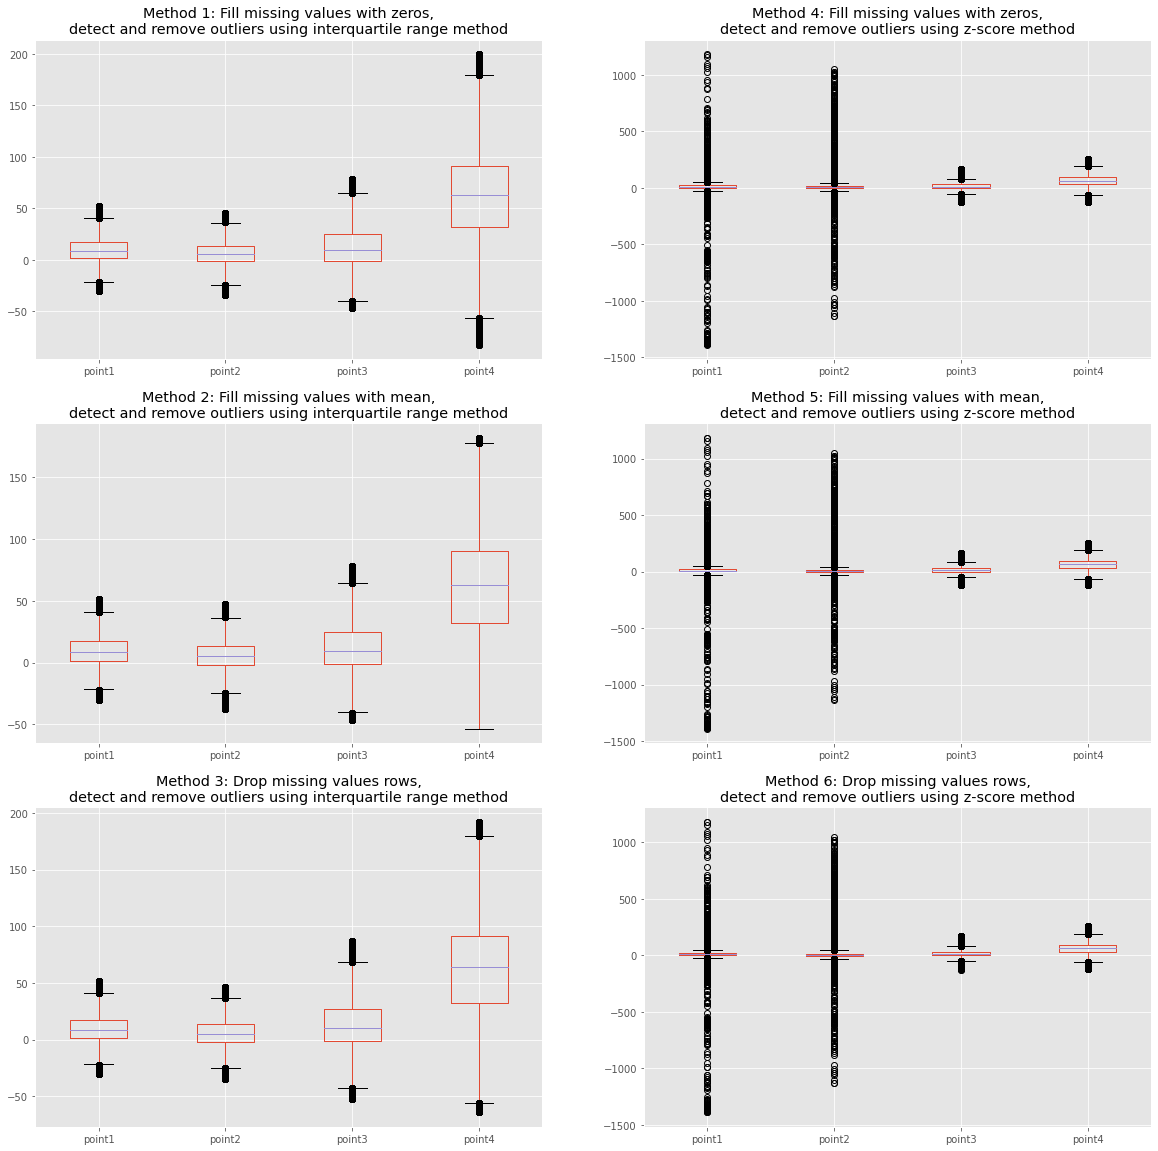

In [22]:
#grouped columns
cols = ['point1','point2','point3','point4']

dataframe = mc2_data.copy()
rdroppedList = []

#Method 1: fill null with 0 and remove outliers using iqr
#---------------------------------------------------------------------------------------------------------------------------#
dfFillZeros = dataframe.copy()
dfFillZeros[cols] = dfFillZeros[cols].fillna(value=0)
r1 = len(dfFillZeros.index)

q1 = dfFillZeros[cols].quantile(0.25)
q3 = dfFillZeros[cols].quantile(0.75)
iqr = q3 - q1 
df1 = dfFillZeros[~((dfFillZeros[cols] < (q1 - iqr * 1.5)) | (dfFillZeros[cols] > (q3 + iqr * 1.5))).any(axis=1)]
r2 = len(df1.index)

#count how many rows dropped
df1_rdropped_count = r1 - r2
rdroppedList.append(df1_rdropped_count)


#Method 2: fill null with mean and remove outliers using iqr
#---------------------------------------------------------------------------------------------------------------------------#
dfFillMean = dataframe.copy()
dfFillMean[cols] = dfFillMean[cols].fillna(value=dfFillMean[cols].mean(skipna=True))
r1 = len(dfFillMean.index)

q1 = dfFillMean[cols].quantile(0.25)
q3 = dfFillMean[cols].quantile(0.75)
iqr = q3 - q1 
df2 = dfFillMean[~((dfFillMean[cols] < (q1 - iqr * 1.5)) | (dfFillMean[cols] > (q3 + iqr * 1.5))).any(axis=1)]
r2 = len(df2.index)

#count how many rows dropped
df2_rdropped_count = r1 - r2
rdroppedList.append(df2_rdropped_count)


#Method 3: drop null and remove outliers using iqr
#---------------------------------------------------------------------------------------------------------------------------#
dfDropNA = dataframe.copy()
dfDropNA.dropna(subset=cols,thresh=1,inplace=True) #drop that column whenever there is 1 NaN
r1 = len(dfDropNA.index)

q1 = dfDropNA[cols].quantile(0.25)
q3 = dfDropNA[cols].quantile(0.75)
iqr = q3 - q1 
df3 = dfDropNA[~((dfDropNA[cols] < (q1 - iqr * 1.5)) | (dfDropNA[cols] > (q3 + iqr * 1.5))).any(axis=1)]
r2 = len(df3.index)

#count how many rows dropped
df3_rdropped_count = r1 - r2
rdroppedList.append(df3_rdropped_count)


#Method 4: fill null with 0 and remove outliers using zscore
#---------------------------------------------------------------------------------------------------------------------------#
dfFillZeros = dataframe.copy()
dfFillZeros[cols] = dfFillZeros[cols].fillna(value=0)
r1 = len(dfFillMean.index)

df4 = dfFillZeros[~((dfFillZeros[cols] < (dfFillZeros[cols].mean() - (3 * dfFillZeros[cols].std()))) | 
                  (dfFillZeros[cols] > (dfFillZeros[cols].mean() + (3 * dfFillZeros[cols].std())))).any(axis=1)]
r2 = len(df4.index)

#count how many rows dropped
df4_rdropped_count = r1 - r2
rdroppedList.append(df4_rdropped_count)


#Method 5: fill null with Mean and remove outliers using zscore
#---------------------------------------------------------------------------------------------------------------------------#
dfFillMean[cols] = dataframe[cols].fillna(value=dataframe[cols].mean(skipna=True))
r1 = len(dfFillMean.index)

df5 = dfFillMean[~((dfFillMean[cols] < (dfFillMean[cols].mean() - (3 * dfFillMean[cols].std()))) | 
                  (dfFillMean[cols] > (dfFillMean[cols].mean() + (3 * dfFillMean[cols].std())))).any(axis=1)]
r2 = len(df5.index)

#count how many rows dropped
df5_rdropped_count = r1 - r2
rdroppedList.append(df5_rdropped_count)


#Method 6: drop null and remove outliers using zscore
#---------------------------------------------------------------------------------------------------------------------------#
dfDropNA = dataframe.copy()
dfDropNA.dropna(subset=cols,thresh=1,inplace=True)
r1 = len(dfDropNA.index)

df6 = dfDropNA[~((dfDropNA[cols] < (dfDropNA[cols].mean() - (3 * dfDropNA[cols].std()))) | 
                  (dfDropNA[cols] > (dfDropNA[cols].mean() + (3 * dfDropNA[cols].std())))).any(axis=1)]
r2 = len(df6.index)

#count how many rows dropped
df6_rdropped_count = r1 - r2
rdroppedList.append(df6_rdropped_count)


#boxplotting
#---------------------------------------------------------------------------------------------------------------------------#
fig, axs = plt.subplots(3,2,figsize=(20,20))

#plt.suptitle('"The basic 6"',fontsize=30,bbox={'facecolor':'0.8','pad':5})
df1.boxplot(column=cols,ax=axs[0,0]).set(title='Method 1: Fill missing values with zeros,\n\
detect and remove outliers using interquartile range method')
df2.boxplot(column=cols,ax=axs[1,0]).set(title='Method 2: Fill missing values with mean,\n\
detect and remove outliers using interquartile range method')
df3.boxplot(column=cols,ax=axs[2,0]).set(title='Method 3: Drop missing values rows,\n\
detect and remove outliers using interquartile range method')
df4.boxplot(column=cols,ax=axs[0,1]).set(title='Method 4: Fill missing values with zeros,\n\
detect and remove outliers using z-score method')
df5.boxplot(column=cols,ax=axs[1,1]).set(title='Method 5: Fill missing values with mean,\n\
detect and remove outliers using z-score method')
df6.boxplot(column=cols,ax=axs[2,1]).set(title='Method 6: Drop missing values rows,\n\
detect and remove outliers using z-score method')

#list out the total rows dropped by 6 methodf
#---------------------------------------------------------------------------------------------------------------------------#
print("\nTotal rows dropped")
print("--------------------")
c = 1
for rows in rdroppedList:
    print('Rows dropped in Case',c,': ',rows)
    c += 1
  

#chosen Methods
#-----------------------------------------------------------------------------------------------------------------------------#
dfchosen1 = df5.copy() #Method 5

### "The inter-z"


Method 7: Remove point3,point4,point5 outliers using iqr then remove point1,point2 outliers using z-score
Number of rows in original data: 202011 
Number of rows after 1st stage of removing outliers: 176274 
Number of rows after 2nd stage of removing outliers: 163559


<AxesSubplot:>

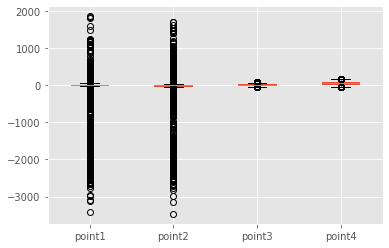

In [37]:
#break into two groups of columns
cols1 = ['point1','point2']
cols2 = ['point3','point4']
cols = cols1 + cols2


#Method 7: remove point3,point4,point5 outliers using iqr, remove point1,point2 outliers using z-score
#-------------------------------------------------------------------------------------------------------------------------#

#step 1: fill all NA values with the column mean
dfFill = dataframe.copy() 
dfFill[cols] = dfFill[cols].fillna(value=dfFill[cols].mean(skipna=True))
r1 = len(dfFill.index)

#step 2: remove p3,p4,p5 outliers with iqr
q1 = dfFill[cols2].quantile(0.25)
q3 = dfFill[cols2].quantile(0.75)
iqr = q3 - q1
dfHybrid1 = dfFill[~((dfFill[cols2] < (q1 - iqr * 1.5)) | (dfFill[cols2] > (q3 + iqr * 1.5))).any(axis=1)]
r2 = len(dfHybrid1.index)

#step 3: remove p1,p2 outliers with z-score
dfHybrid2 = dfHybrid1[~((dfHybrid1[cols1] < (dfHybrid1[cols1].mean() - (3 * dfHybrid1[cols1].std()))) | 
                  (dfHybrid1[cols1] > (dfHybrid1[cols1].mean() + (3 * dfHybrid1[cols1].std())))).any(axis=1)]
r3 = len(dfHybrid2.index)

print('\nMethod 7: Remove point3,point4,point5 outliers using iqr then remove point1,point2 outliers using z-score')
print('Number of rows in original data:',r1,'\nNumber of rows after 1st stage of removing outliers:',r2,
      '\nNumber of rows after 2nd stage of removing outliers:',r3)

dfHybrid1.boxplot(column=cols)

### comparison with the original dataset

<AxesSubplot:>

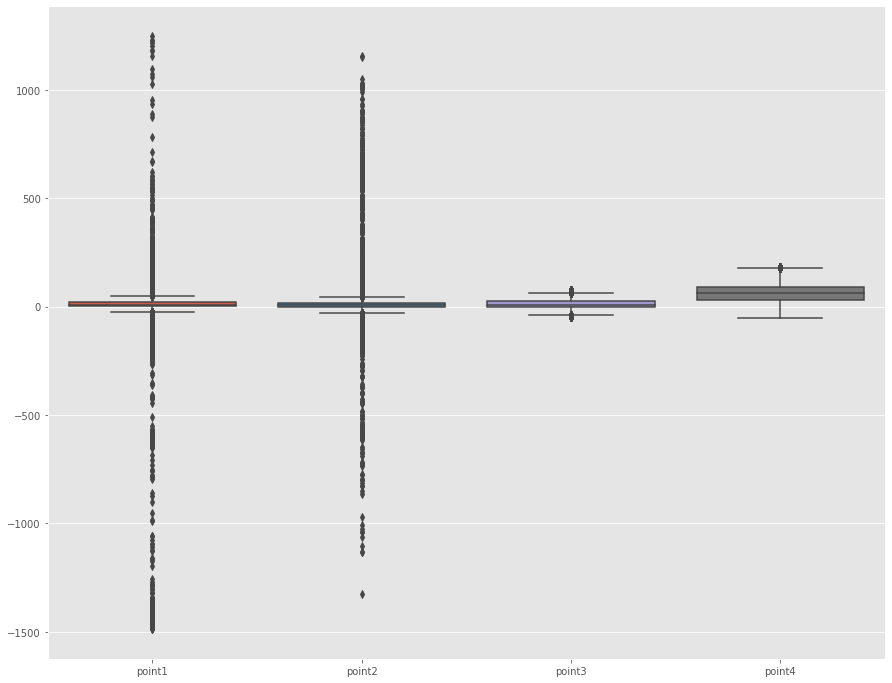

In [40]:
fig, axs = plt.subplots(figsize=(15,12))

#sns.boxplot(data=dataframe[cols],orient='v',ax=axs)
sns.boxplot(data=dfHybrid2[cols],orient='v',ax=axs)

### "The fill all"

[Text(0.5, 1.0, 'Method 9: Fill missing values with mean,\ndetect outliers using interquartile range method and replace outliers with mean')]

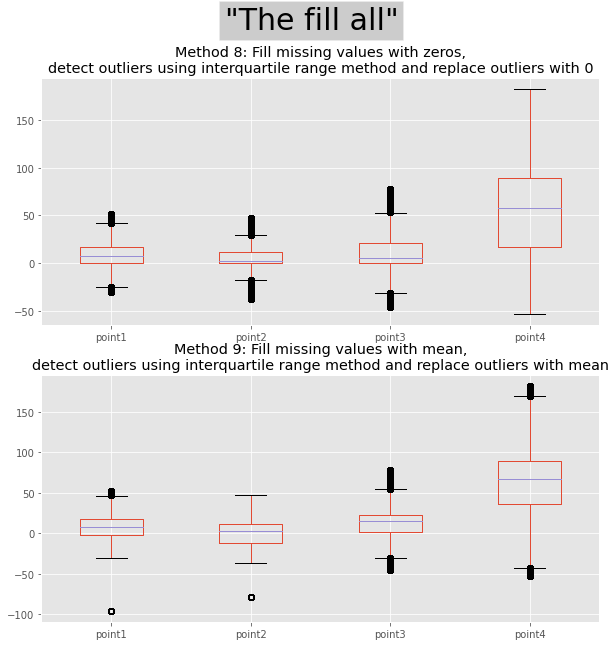

In [43]:
#fill all 0
dataframe = mc2_data.copy()
dfFillAll = dataframe.copy()
cols = ['point1','point2','point3','point4']

dfFillAll[cols] = dfFillAll[cols].fillna(0)

dfFillAll[cols] = np.where(((dfFillAll[cols] < (q1 - iqr * 1.5)) | (dfFillAll[cols] > (q3 + iqr * 1.5))), 
                               0,dfFillAll[cols])

dfFillAll0 = dfFillAll.copy()

#fill all mean
dataframe = mc2_data.copy()
dfFillAll = dataframe.copy()
cols = ['point1','point2','point3','point4']

dfFillAll[cols] = dfFillAll[cols].fillna(value=dfFillAll[cols].mean(skipna=True))

q1 = dfFillAll[cols].quantile(0.25)
q3 = dfFillAll[cols].quantile(0.75)
iqr = q3 - q1

dfFillAll[cols] = np.where(((dfFillAll[cols] < (q1 - iqr * 1.5)) | (dfFillAll[cols] > (q3 + iqr * 1.5))), 
                               dfFillAll[cols].mean(skipna=True) ,dfFillAll[cols])

dfFillAll1 = dfFillAll.copy()

#boxplot
fig, axs = plt.subplots(2,1,figsize=(10,10))

plt.suptitle('"The fill all"',fontsize=30,bbox={'facecolor':'0.8','pad':5})
dfFillAll0.boxplot(column=cols,ax=axs[0]).set(title='Method 8: Fill missing values with zeros,\n\
detect outliers using interquartile range method and replace outliers with 0')
dfFillAll1.boxplot(column=cols,ax=axs[1]).set(title='Method 9: Fill missing values with mean,\n\
detect outliers using interquartile range method and replace outliers with mean')



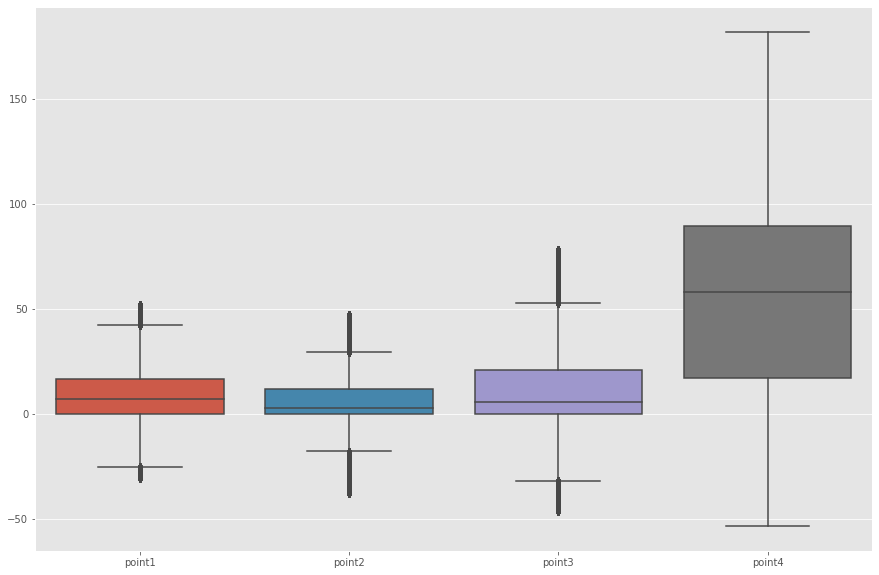

In [45]:
#Method 8: fill NA with mean, find outliers using iqr and fill with mean
#-------------------------------------------------------------------------------------------------------------------------#
dataframe = mc2_data.copy()
dfFillAll = dataframe.copy()
cols = ['point1','point2','point3','point4']

dfFillAll[cols] = dfFillAll[cols].fillna(value=dfFillAll[cols].mean(skipna=True))

q1 = dfFillAll[cols].quantile(0.25)
q3 = dfFillAll[cols].quantile(0.75)
iqr = q3 - q1

dfFillAll[cols] = np.where(((dfFillAll[cols] < (q1 - iqr * 1.5)) | (dfFillAll[cols] > (q3 + iqr * 1.5))), 
                               dfFillAll[cols].mean(skipna=True) ,dfFillAll[cols])

dfFillAll1 = dfFillAll.copy()


#Method 9: fill NA 0, find outliers using iqr and fill with 0
#-------------------------------------------------------------------------------------------------------------------------#
dataframe = mc2_data.copy()
dfFillAll = dataframe.copy()
cols = ['point1','point2','point3','point4']

dfFillAll[cols] = dfFillAll[cols].fillna(0)

dfFillAll[cols] = np.where(((dfFillAll[cols] < (q1 - iqr * 1.5)) | (dfFillAll[cols] > (q3 + iqr * 1.5))), 
                               0 ,dfFillAll[cols])

dfFillAll2 = dfFillAll.copy()

#boxplot
fig, axs = plt.subplots(figsize=(15,10))
#sns.boxplot(data=dfFillAll1[cols],orient='v',ax=axs)
sns.boxplot(data=dfFillAll2[cols],orient='v',ax=axs)
#sns.distplot(dfFillAll[cols],ax=axs[1])

#chosen df
#-----------------------------------------------------------------------------------------------------------------------------#

dfchosen2 = dfFillAll1.copy() #Method 9
dfchosen3 = dfFillAll2.copy() #Method 8


### Histogram of each chosen Methods

### original data

<AxesSubplot:ylabel='Count'>

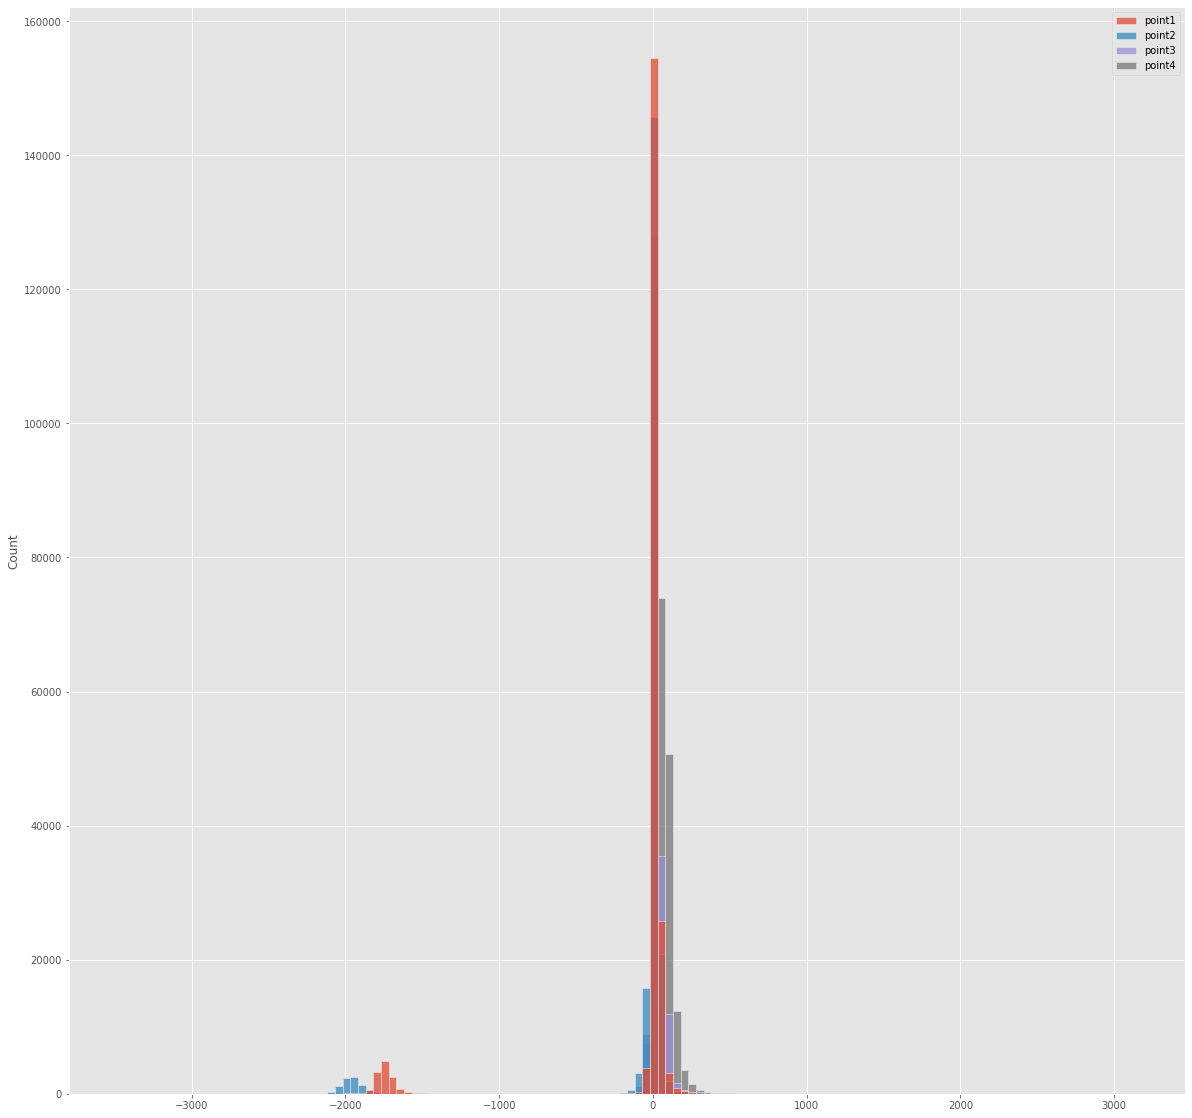

In [46]:
cols = ['point1','point2','point3','point4']

fig, axs = plt.subplots(figsize=(20,20))

sns.histplot(dataframe[cols],ax=axs,binwidth=50)

### Method 1

<AxesSubplot:ylabel='Count'>

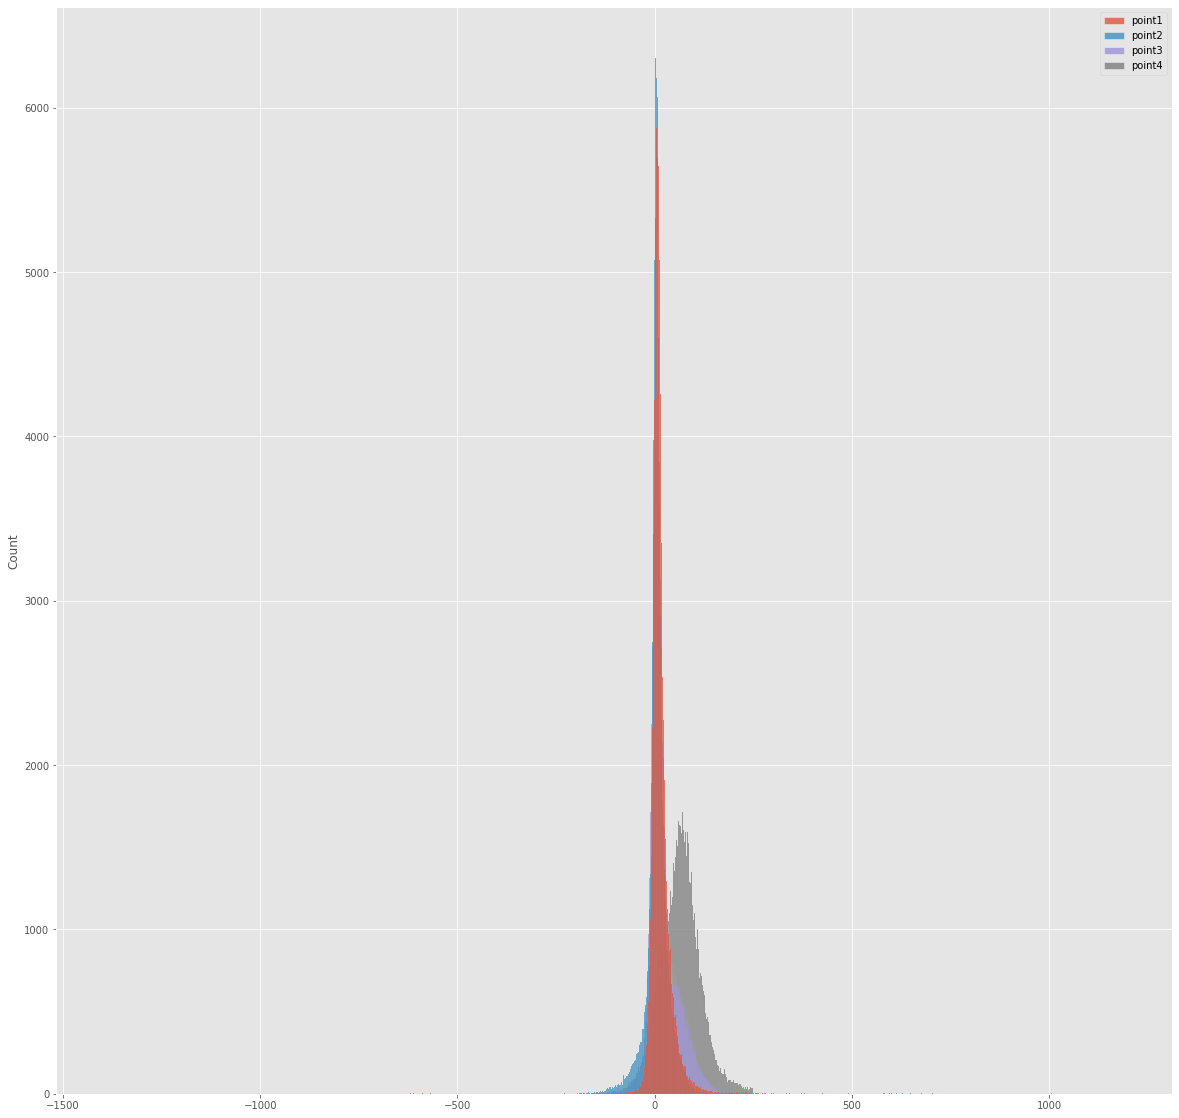

In [47]:
fig, axs = plt.subplots(figsize=(20,20))

sns.histplot(dfchosen1[cols],ax=axs)

### Method 9

<AxesSubplot:ylabel='Count'>

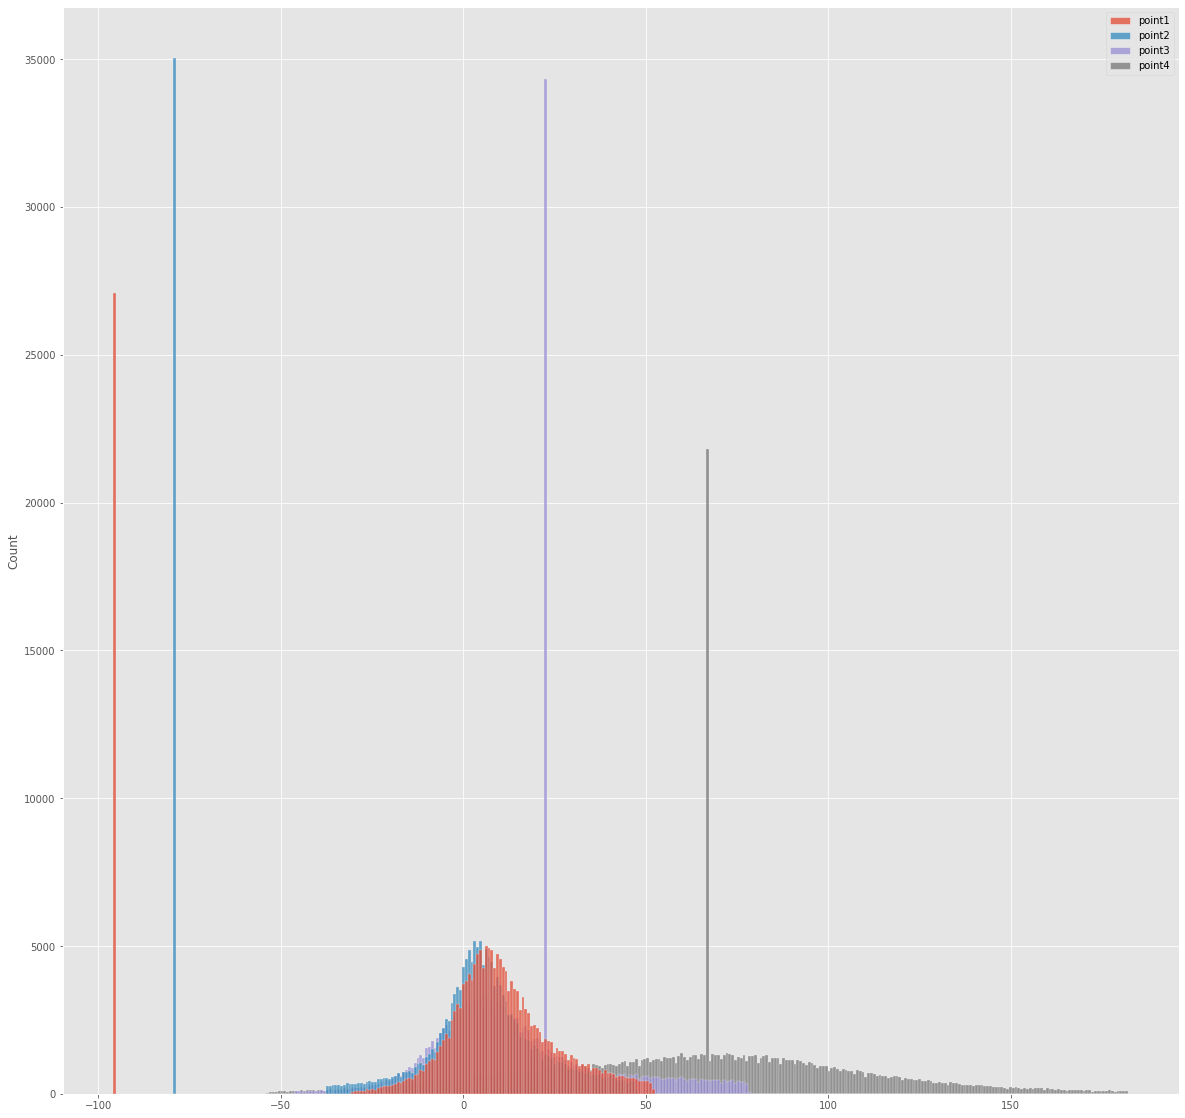

In [48]:
fig, axs = plt.subplots(figsize=(20,20))

sns.histplot(dfchosen2[cols],ax=axs)

### Method 8

<AxesSubplot:ylabel='Count'>

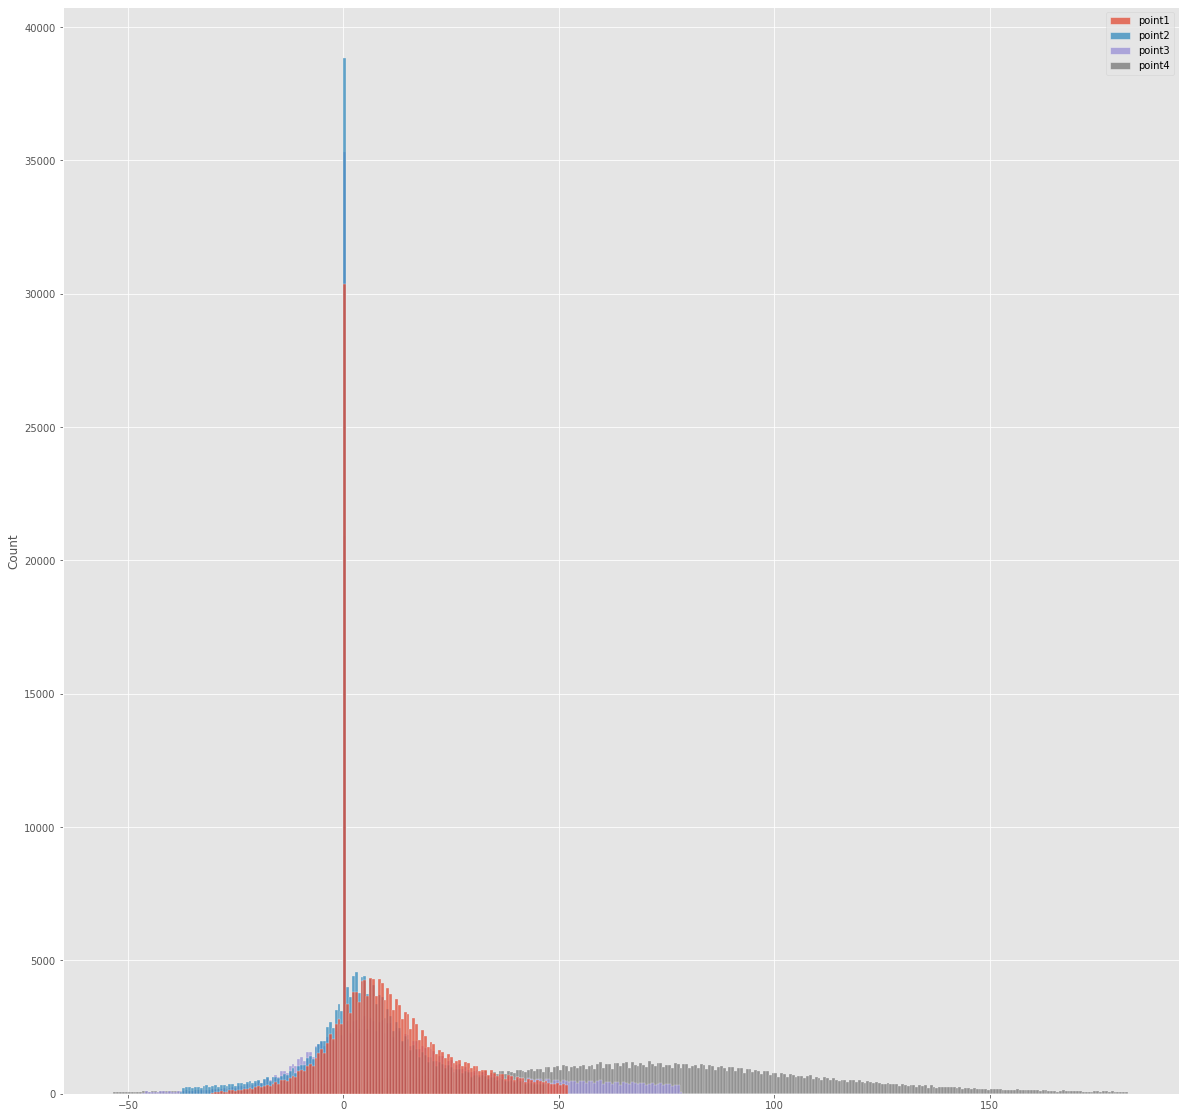

In [49]:
fig, axs = plt.subplots(figsize=(20,20))

sns.histplot(dfchosen3[cols],ax=axs)

### Export data for modelling

In [60]:
#chosen data:
#drop dayOfWeek
dataset1 = dfchosen1.copy() #Method 5
dataset2 = dfchosen2.copy() #Method 9
dataset3 = dfchosen3.copy() #Method 8

#final check for null values
anyEmptyCols = dataset1.isnull().any().any() & dataset2.isnull().any().any() & dataset3.isnull().any().any() & dataset4.isnull().any().any() & dataset5.isnull().any().any()
print("Is there any empty columns left in each datasets? ",anyEmptyCols)


Is there any empty columns left in each datasets?  False


In [28]:
dataset1.to_csv('MC2_Datasets\Dataset_1.csv',index=False)
dataset2.to_csv('MC2_Datasets\Dataset_2.csv',index=False)
dataset3.to_csv('MC2_Datasets\Dataset_3.csv',index=False)